#**ÖRNEK**

Makine öğrenmesi modeli performans değerlendirme ölçülerinin hesaplanması için hazır veri seti ve farklı bir sınıflandırıcı ile yapılan örnek verilmiştir. Bunun için *sklearn* kütüphanesinde bulunan üç çıkış sınıfına sahip olan wine veri setinin *Gaussian Naive Bayes* sınıflandırıcısına uygulandığı makine öğrenmesi çıktısı incelenmştir. Uygulama Python programında yapılmıştır. Programda öncelikle *Scikit-learn* veri setleri kütüphanesinden *wine* veri seti yükleniyor. Daha sonra veri setinin %70'i eğitim ve %30'u test verisi olarak ayrılıyor. Elde edilen eğitim veri seti ile model eğitiliyor. Ardından test verisi girilerek tahmin yaptırılıyor.

Kodlarda görülebileceği üzere önce *Doğruluk*, *Kesinlik*, *Duyarlılık-Hatırlatma*, *F1 Skoru* ayrı ayrı hesaplanıyor. Bu değerleri her çıkış sınıfı için hesaplatarak modelin performans özetini çıkarmak için *scikit-learn* kütüphanesindeki *classification.report* işlevi kullanılıyor. Böylece *Doğruluk*, *Kesinlik*, *Duyarlılık-Hatırlatma*, *F1 Skoru* ölçülerinin değerlerini makine öğrenmesinde 3 ayrı çıkış sınıfı bulunduğu için her bir çıkış için değerler ayrı ayrı verilmektedir. Buradan test veri setindeki 54 verinin sınıflara göre dağılımlarını ve tüm model çıkışını kapsayan ortalama değerleri bulmak mümkündür.




Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

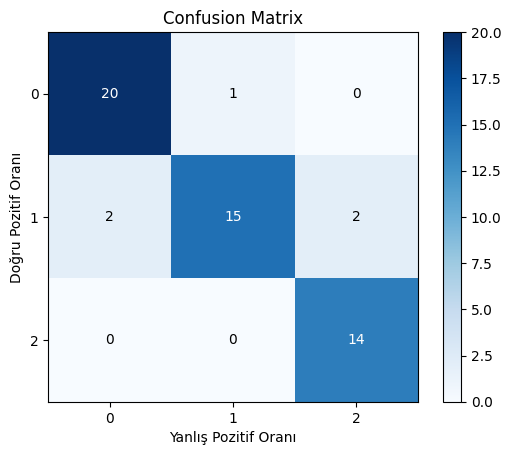

In [ ]:
#scikit-learn veri setleri kütüphanesi içe aktarılır.
from sklearn import datasets

#wine veri setini yükle
wine=datasets.load_wine()

#Veri setindeki 13 özelliğin isimlerini yazdır.
print("Features:",wine.feature_names)

#wine etiket türlerini yazdır.
print("Labels:",wine.target_names)

#veri özellik şeklini yazdır
wine.data.shape

#En üstteki 5 veri için özellikleri yazdır.
print(wine.data[0:])

#wine etiketlerini yazdır(0:sınıf_0, 1:sınıf_2, 2:sınıf_2)
print(wine.target)

#eğitim ve test verilerini otomatik bölmek için train_test_split
#fonksiyonu içe aktar
from sklearn.model_selection import train_test_split

#eğitim ve test verisi olarak ayır
#%70 eğitim ve %30 test verisi olarak ayarlanır
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3,random_state=109)

#Gaussian Naive Bayes Modelini içe aktar
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#Bir Gaussian sınıflandırıcı oluştur.
LR= LogisticRegression(solver='liblinear', multi_class='ovr')


#Eğitim veri setleri kullanarak modeli eğitme
LR.fit(X_train,y_train)

#Test veri seti için çıktıları tahmin ettirme
y_pred=LR.predict(X_test)
print("*"*25)

# Doğruluk hesaplaması için scikit-learn metrik modülünü içe aktarın.
from sklearn import metrics

#Model doğruluk değerini hesaplama
print("Doğruluk (Accuracy):",metrics.accuracy_score(y_test,y_pred))
print("*"*25)
from sklearn.metrics import precision_score
#Modelin kesinlik değerini hesaplama
Kesinlik=precision_score(y_test,y_pred,average='weighted')
print("Kesinlik(precision):", Kesinlik)
print("*"*25)
from sklearn.metrics import recall_score
Duyar=recall_score(y_test,y_pred,average='weighted')
print("Hatırlatma(Duyarlılık):", Duyar)
print("*"*25)
#Modelin F1 skoru değerini hesaplama
from sklearn.metrics import f1_score
#Model F1 puanı
f1puan=f1_score(y_test,y_pred,average='weighted')
print("F1 skoru:", f1puan)
print("*"*25)
#Sınıflandırıcı modelinin performans özetini alma
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
print("*"*25)
#Karmaşıklık matrisi ile ilgili kütüphaneler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Karışıklık matrisinin yazdırılması
karmat=confusion_matrix(y_test,y_pred,labels=[0,1,2])
print("Karmaşıklık Matrisi:",karmat)
!pip install scikit-plot
import scikitplot as skplt
#Karmaşıklık matrisinin çizdirilmesi
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#eksen etiketleri
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.show()

In [ ]:
#scikit-learn veri setleri kütüphanesi içe aktarılır.
from sklearn import datasets

#wine veri setini yükle
wine=datasets.load_wine()

#Veri setindeki 13 özelliğin isimlerini yazdır.
print("Features:",wine.feature_names)

#wine etiket türlerini yazdır.
print("Labels:",wine.target_names)

#veri özellik şeklini yazdır
wine.data.shape

#En üstteki 5 veri için özellikleri yazdır.
print(wine.data[0:])

#wine etiketlerini yazdır(0:sınıf_0, 1:sınıf_2, 2:sınıf_2)
print(wine.target)

#eğitim ve test verilerini otomatik bölmek için train_test_split
#fonksiyonu içe aktar
from sklearn.model_selection import train_test_split

#eğitim ve test verisi olarak ayır
#%70 eğitim ve %30 test verisi olarak ayarlanır
X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.3,random_state=109)

#Gaussian Naive Bayes Modelini içe aktar
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
#Bir Gaussian sınıflandırıcı oluştur.
LR= LogisticRegression(solver='liblinear', multi_class='ovr')


#Eğitim veri setleri kullanarak modeli eğitme
LR.fit(X_train,y_train)

#Test veri seti için çıktıları tahmin ettirme
y_pred=LR.predict(X_test)
print("*"*25)

# Doğruluk hesaplaması için scikit-learn metrik modülünü içe aktarın.
from sklearn import metrics

#Model doğruluk değerini hesaplama
print("Doğruluk (Accuracy):",metrics.accuracy_score(y_test,y_pred))
print("*"*25)
from sklearn.metrics import precision_score
#Modelin kesinlik değerini hesaplama
Kesinlik=precision_score(y_test,y_pred,average='weighted')
print("Kesinlik(precision):", Kesinlik)
print("*"*25)
from sklearn.metrics import recall_score
Duyar=recall_score(y_test,y_pred,average='weighted')
print("Hatırlatma(Duyarlılık):", Duyar)
print("*"*25)
#Modelin F1 skoru değerini hesaplama
from sklearn.metrics import f1_score
#Model F1 puanı
f1puan=f1_score(y_test,y_pred,average='weighted')
print("F1 skoru:", f1puan)
print("*"*25)
#Sınıflandırıcı modelinin performans özetini alma
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)
print("*"*25)
#Karmaşıklık matrisi ile ilgili kütüphaneler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Karışıklık matrisinin yazdırılması
karmat=confusion_matrix(y_test,y_pred,labels=[0,1,2])
print("Karmaşıklık Matrisi:",karmat)
!pip install scikit-plot
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#eksen etiketleri
plt.xlabel('Yanlış Pozitif Oranı')
plt.ylabel('Doğru Pozitif Oranı')
plt.show()

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels: ['class_0' 'class_1' 'class_2']
Veri şekli: (178, 13)
Veri örnekleri: [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
Etiketler: [0 0 0 0 0 0 0 

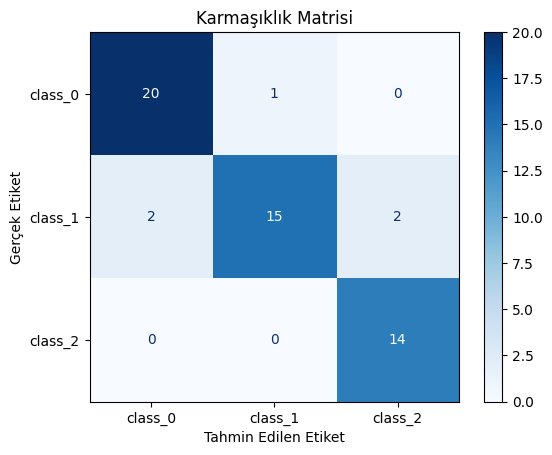

In [ ]:
# Gerekli kütüphaneler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Wine veri setini yükle
wine = datasets.load_wine()

# Özellik isimleri
print("Features:", wine.feature_names)

# Etiket isimleri
print("Labels:", wine.target_names)

# Veri boyutu
print("Veri şekli:", wine.data.shape)

# İlk 5 veri örneği
print("Veri örnekleri:", wine.data[:5])

# Etiketler
print("Etiketler:", wine.target)

# Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=109)

# Gaussian Naive Bayes modelini oluştur ve eğit
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Test verisi için tahmin yap
y_pred = gnb.predict(X_test)

print("*" * 25)

# Doğruluk
print("Doğruluk (Accuracy):", metrics.accuracy_score(y_test, y_pred))
print("*" * 25)

# Kesinlik (Precision)
kesinlik = precision_score(y_test, y_pred, average='weighted')
print("Kesinlik (Precision):", kesinlik)
print("*" * 25)

# Duyarlılık (Recall)
duyarlilik = recall_score(y_test, y_pred, average='weighted')
print("Hatırlama (Recall):", duyarlilik)
print("*" * 25)

# F1 Skoru
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Skoru:", f1)
print("*" * 25)

# Sınıflandırma raporu
report = classification_report(y_test, y_pred)
print(report)
print("*" * 25)

# Karışıklık Matrisi
karmat = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
print("Karmaşıklık Matrisi:", karmat)

# Görselleştirme (Scikit-Learn)
disp = ConfusionMatrixDisplay(confusion_matrix=karmat, display_labels=wine.target_names)
disp.plot(cmap='Blues')
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.show()


*************************
Yeteneksiz:ROC AUC 0.500000
Lojistik sınıflandırıcı 0.902772
*************************


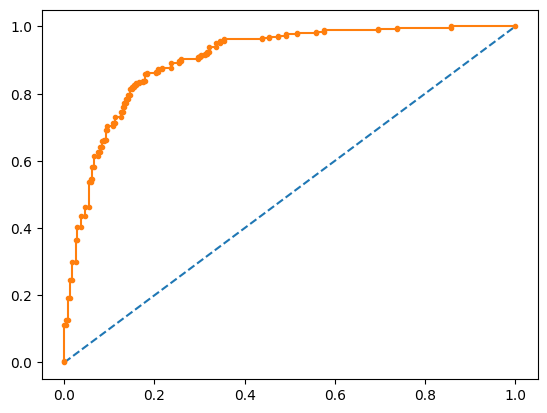

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#2 çıkıl sınıflı veri seti üretme
X,y =make_classification(n_samples=1000,n_classes=2, random_state=1)
#Eğitim ve veri setlerini ayırma
trainX,testX,trainy,testy=train_test_split(X,y,test_size=0.5,random_state=2)
#yeteneksiz tahmin oluşturma (çoğunluk sınıfı)
ns_probs=[0 for _ in range(len(testy))]
#Bir model oluşturma
model=LogisticRegression(solver='lbfgs')
model.fit(trainX,trainy)
# ihtimalleri tahmin etme
lr_probs=model.predict_proba(testX)
#Sadece pozitifçıktılar için ihtimalleri muhafaza etme
lr_probs=lr_probs[:,1]
#skorları hesaplama
ns_auc=roc_auc_score(testy, ns_probs)
lr_auc=roc_auc_score(testy,lr_probs)
#özet skorlar
print("*"*25)
print("Yeteneksiz:ROC AUC %3f" % (ns_auc))
print("Lojistik sınıflandırıcı %3f" % (lr_auc))
print("*"*25)
#roc eğrisi
ns_fpr,ns_tpr,_=roc_curve(testy,ns_probs)
lr_fpr,lr_tpr,_=roc_curve(testy,lr_probs)
import matplotlib.pyplot as pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#model için roc eğrisi çizme
pyplot.plot(ns_fpr,ns_tpr,linestyle='--',label='Yeteneksiz')
pyplot.plot(lr_fpr,lr_tpr,marker='.',label='Lojistik')
#eksen etiketleri


**Korelasyon Nedir?**
Korelasyon, iki ya da daha fazla rassal (belirli bir düzen, örüntü veya tahmin edilebilirlik içermemesi anlamına gelir) değişken arasındaki doğrusal ilişkinin yönünü ve şiddetini gösterir. Kavrama veriler üzerinden mantıksal çıkarım yapma imkânı verdiği için ekonomi gibi farklı alanlarda da sıklıkla başvurulur

Korelasyon temel anlamda iki ya da daha fazla değişken arasındaki ilişkiyi göstermek için kullanılır.

Denek ya da bireylerin iki değişkene ait değerleri olduğunda korelasyon tekniklerinin yararlanılarak iki değişken arasındaki ilişki hesaplanabilir.

Korelasyon, birlikte değişimin bir göstergesidir.

İki veya daha fazla değişken arasındaki ilişkinin miktarını ve yönünü sayısal olarak belirlememizi sağlayan istatistiksel bir tekniktir.

Korelasyon katsayısı “r” ile gösterilir. Korelasyon katsayısı matematiksel olarak -1 ile +1 arasında değerler alır.

Bu katsayının işareti, iki değişken arasındaki ilişkinin yönü; sayısal değeri ise ilişkinin gücü hakkında bilgi verir.

Saçılma Diyagramı:

Korelasyon, ölçme alanında sıklıkla kullanılan bir yöntemdir ve çoğu kez grafikle gösterilir.

Saçılma diyagramı, iki değişken arasındaki ilişkiyi görsel olarak betimlemede kullanılan bir grafik türüdür. Saçılma diyagramı, X-Y puanlarının her bir çiftinin iki boyutlu bir düzleme yerleştirilmesini gösterir.

X ve Y değişkenlerine ait puan çiftlerinin düzlemdeki yerleri nokta veya başka bir sembolle gösterilir (Her noktanın X ve Y olmak üzere iki değişkende karşılığı var.)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


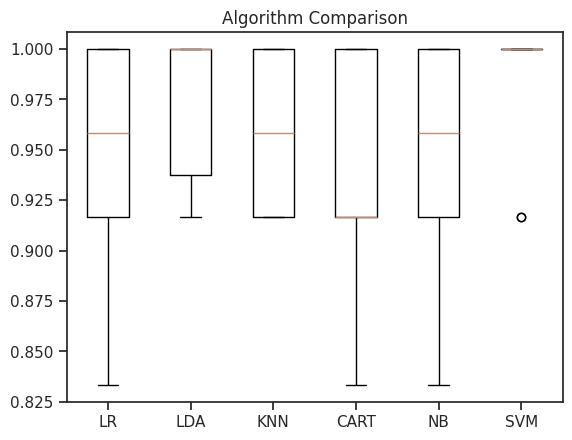

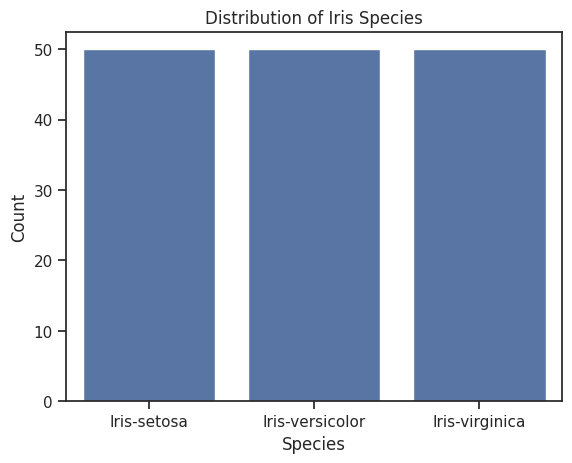

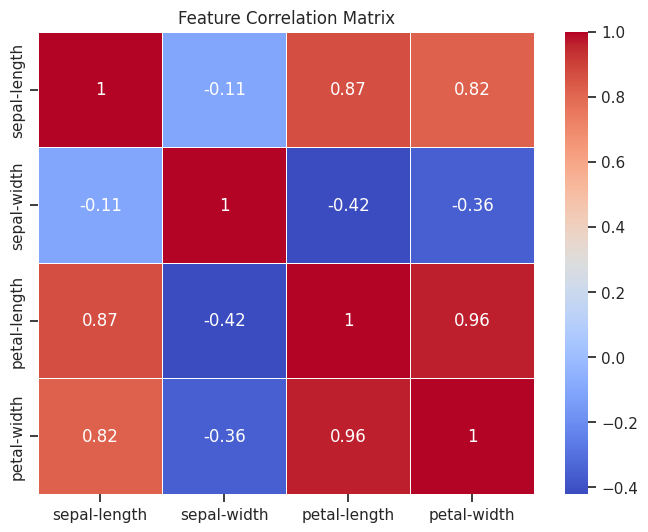

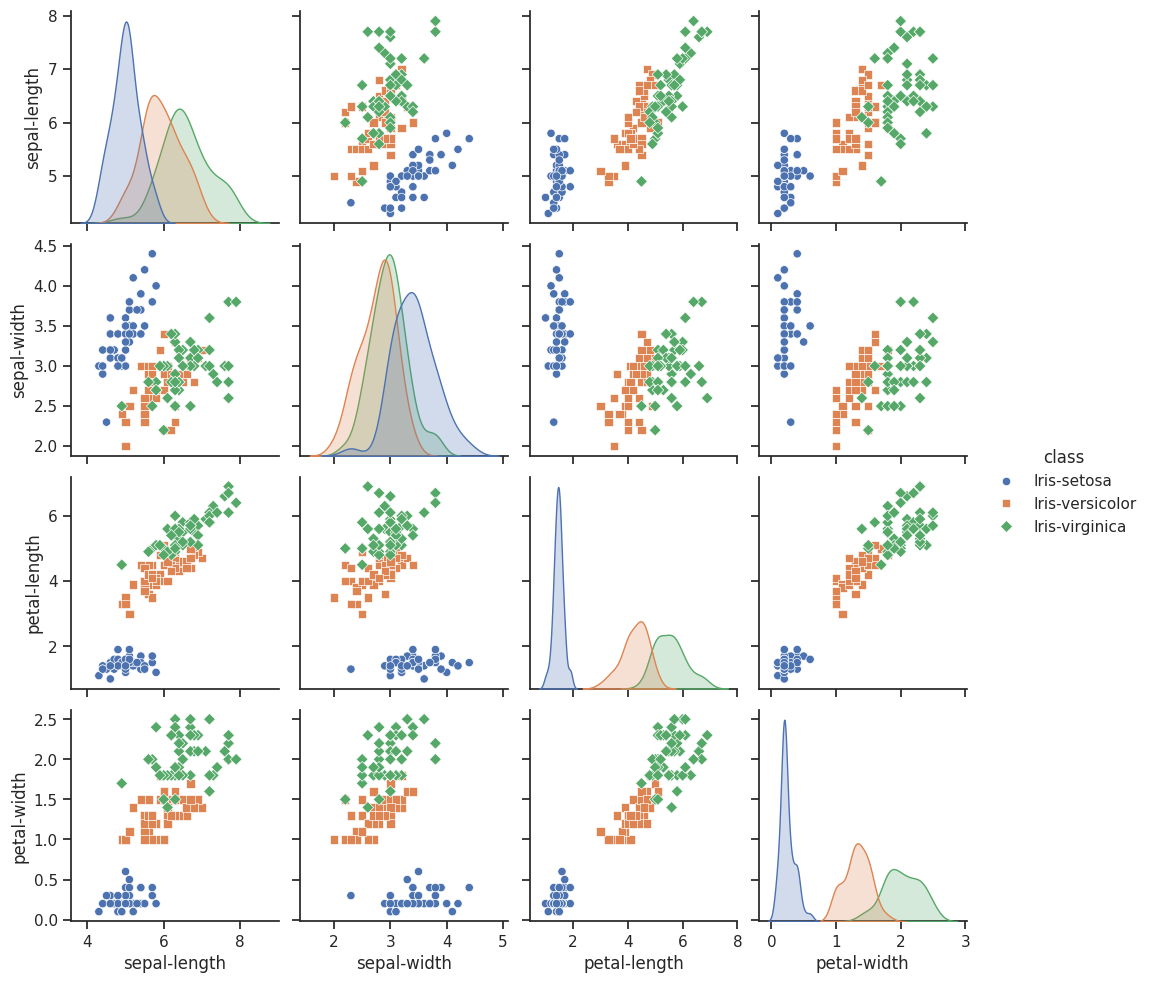

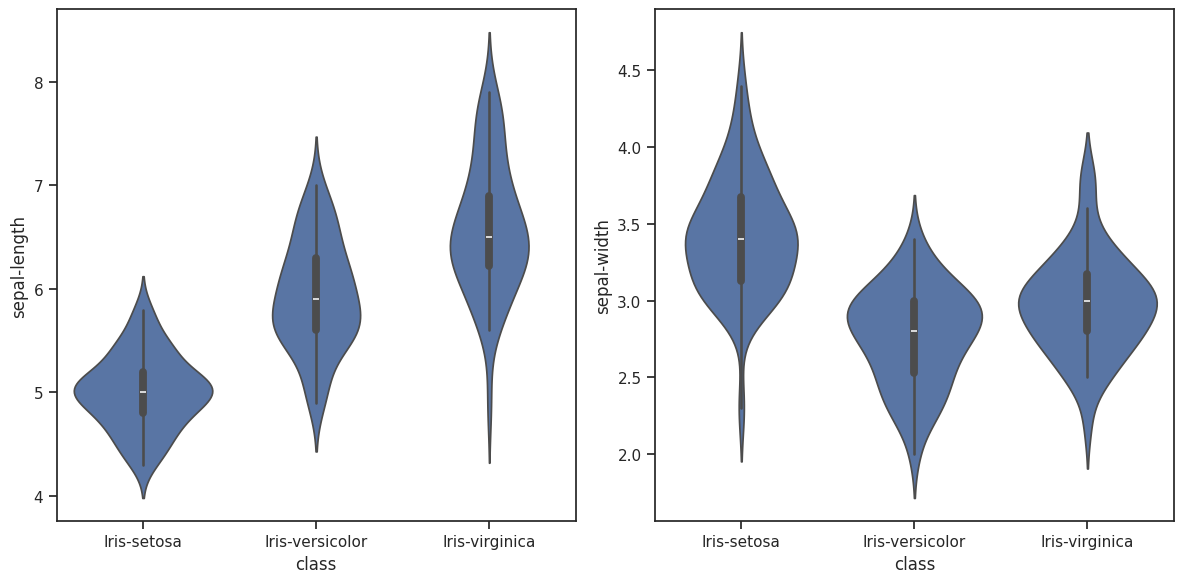

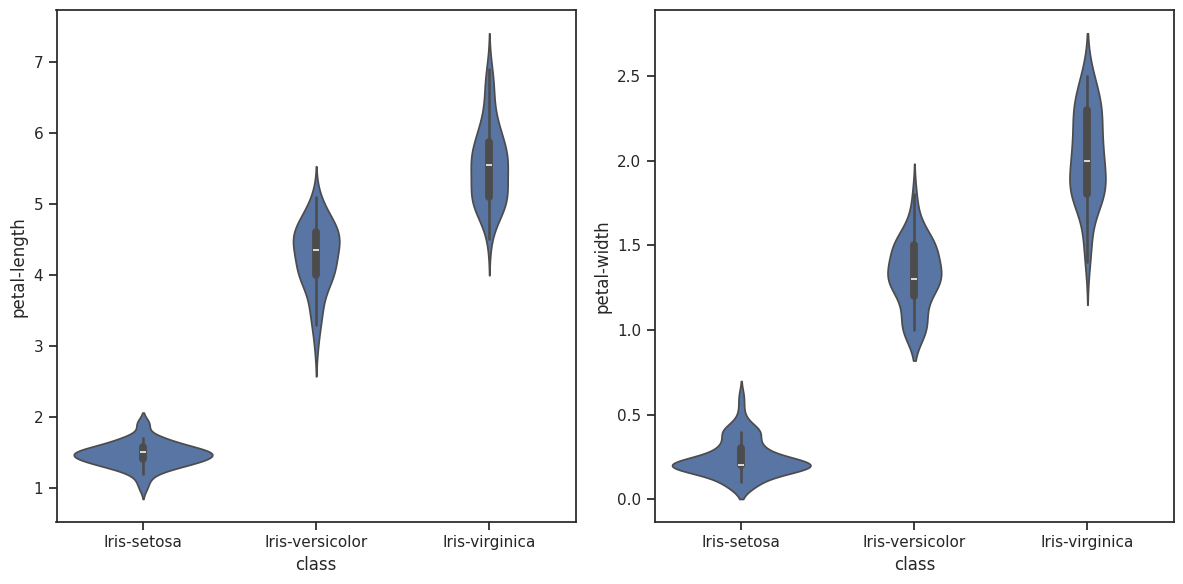

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = read_csv(url, names=names)

# Split-out validation dataset
array = data.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# Spot Check Algorithms
models = [
    ('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('CART', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC(gamma='auto'))
]

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
plt.figure()
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Plot class distribution
plt.figure()
sns.countplot(x='class', data=data)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
correlation_matrix = data.iloc[:, :4].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Pairplot for pairwise relationships
sns.set(style="ticks")
sns.pairplot(data, hue="class", markers=["o", "s", "D"])
plt.show()

# Violin plots for each feature by class
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x="class", y="sepal-length", data=data)
plt.subplot(1, 2, 2)
sns.violinplot(x="class", y="sepal-width", data=data)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x="class", y="petal-length", data=data)
plt.subplot(1, 2, 2)
sns.violinplot(x="class", y="petal-width", data=data)
plt.tight_layout()
plt.show()


Mounted at /content/gdrive
        id  age  gender  region    income  married  children  car  product1  \
0  ID12101   48       0       0  17546000        0         1    0         0   
1  ID12102   40       1       3  30085100        1         3    1         1   
2  ID12103   51       0       0  16575400        1         0    1         1   
3  ID12104   23       0       3  20375400        1         3    0         1   
4  ID12105   57       0       1  50576300        1         0    0         0   

   product2  return  
0         0       1  
1         1       0  
2         0       0  
3         0       0  
4         0       0  
id          object
age          int64
gender       int64
region       int64
income       int64
married      int64
children     int64
car          int64
product1     int64
product2     int64
return       int64
dtype: object
Unique values in y: [0 1]
Data type of y: int64
LR: 0.5167 (0.0917)
LDA: 0.6417 (0.0972)
KNN: 0.5917 (0.0850)
CART: 0.7625 (0.0723)
NB: 0.6167 

<ipython-input-61-a78f383b2283>:67: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


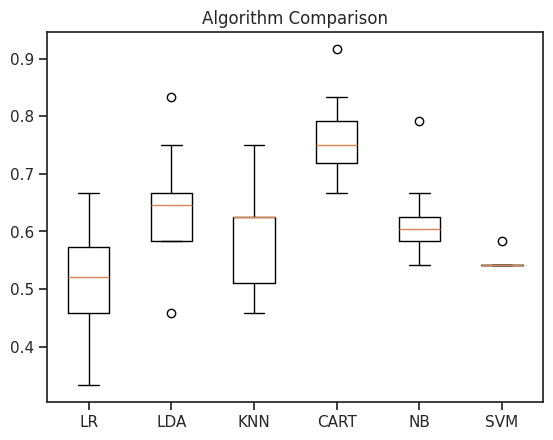

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# Load Dataset
df = pd.read_excel('/content/gdrive/MyDrive/Sample/datasample.xlsx')

# Preview data
print(df.head())
print(df.dtypes)

# Extract features and target
X = df.iloc[:, 1:10].values  # adjust columns as needed
y_raw = df.iloc[:, 10]       # target column

# Clean and encode target variable
y = pd.Series(y_raw)

# Convert categorical targets to numeric
if y.dtype == 'object':
    y = y.astype('category').cat.codes

# Fill or drop NaNs if needed
y = y.fillna(0).astype(int)

# Sanity check
print("Unique values in y:", np.unique(y))
print("Data type of y:", y.dtype)

# Train-test split
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X, y, test_size=0.20, random_state=1, shuffle=True
)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluate models
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')

# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()
